* https://docs.microsoft.com/en-us/azure/cognitive-services/face/quickstarts/client-libraries?tabs=visual-studio&pivots=programming-language-python
* https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395250

# Get free tire from azure 

## Step 1 : Create free azure account

## Step 2 : Go to your portal > click on AI + machine learning > click on see all (Free training from Microsoft sell all(this one see all) ) > search by Face > selece : Identify faces and expressions by using the Computer Vision API in Azure Cognitive Services 

* Yo tutoraila padyasi last ma kasari Subscription key and endpoint lini vanyara vanxa.

## Step 3  : step 2  padyapaxi hamle : Subscription key and endpoint lini vanyara vanxa.

## Step 4 : Select + Create a resource > AI + Machine Learning > Face. Resource create garni suruma (auta Plus blank button x create a resource vanyara) 

## Step 5 : Enter a unique name for your Face API subscription, and then choose the Location nearest to you.

## Step 6 : Select the free or lowest-cost Pricing tier.

## Step 7 : Create a new Resource group named mslearn-faceapi. You'll later delete these resources.

## Step 8 : Acknowledge the Cognitive Services notice that uses of this service is not for a police department.

## Step 9 : Select Create to subscribe to the Face API.




 
 

## Access the subscription key and endpoint ( end point and key tyahanira didaiina so kaha jani ta vanda)

### After you create a Face API subscription, you're almost ready to start experimenting with the Face API.

### Because all Computer Vision APIs are REST-based, you can use your language of choice to provide a subscription key (or API key) to the Computer Vision API endpoint (or URL).

### To view the subscription key and endpoint for your Computer Vision subscription:

### On the left sidebar, select Resource groups, and then select the resource group you created for the Computer Vision API.

### To view your new subscription keys, select the Face API subscription name (such as Face). Then under Resource Management, select Keys and Endpoints.

### Copy and save the values of KEY 1 and ENDPOINT. These will be used when connecting to the API.



Maile 


```
gmail : madan.baduwal@nicnepal.org
password :

Key 1 : d1c82aaaf4f145c39e4397ec83602c7e

key 2 : e935727a1bb14cfaad294565904da6d6

end point : https://madan.cognitiveservices.azure.com/

location : eastus


Note : duota key ma jun use garyani hunxa , 

teskai maithi regenerating feature x , auta key regenerate garirako bela arko use garna milxa vanyara duota key deko ho.

```



# Code  example

## Exercise - Test the Face Detection API


In [1]:
! export COGNITIVE_SERVICE_KEY=d1c82aaaf4f145c39e4397ec83602c7e # notebook ma yo mannirako xaina tala herda , so yo only os ma garni ok.
! export COGNITIVE_SERVICE_ENDPOINT=https://madan.cognitiveservices.azure.com/

In [ ]:
! pip install azure-cognitiveservices-vision-face

In [3]:
import os
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face import FaceClient

In [10]:
def get_face_client():
    """Create an authenticated FaceClient."""
    SUBSCRIPTION_KEY = "d1c82aaaf4f145c39e4397ec83602c7e" # os.environ["COGNITIVE_SERVICE_KEY"]
    ENDPOINT = "https://madan.cognitiveservices.azure.com/" #os.environ["COGNITIVE_SERVICE_ENDPOINT"]
    credential = CognitiveServicesCredentials(SUBSCRIPTION_KEY)
    return FaceClient(ENDPOINT, credential)

In [11]:
get_face_client()

In [12]:
face_client = get_face_client()

url = "https://docs.microsoft.com/en-us/learn/data-ai-cert/identify-faces-with-computer-vision/media/clo19_ubisoft_azure_068.png"

attributes = ["emotion", "glasses", "smile"]
include_id = True
include_landmarks = False

detected_faces = face_client.face.detect_with_url(url, include_id, include_landmarks, attributes, raw=True)

if not detected_faces:
    raise Exception('No face detected in image')

print(detected_faces.response.json())

[{'faceId': '2d8eb358-7942-4983-ad64-b88407f0e65c', 'faceRectangle': {'top': 303, 'left': 920, 'width': 161, 'height': 161}, 'faceAttributes': {'smile': 0.978, 'glasses': 'ReadingGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.978, 'neutral': 0.019, 'sadness': 0.002, 'surprise': 0.0}}}]


Mathi hamle key ra end point banayam face ko lagi aba tesko documentation padxam.

# [Face ](https://docs.microsoft.com/en-us/azure/cognitive-services/face/)

* https://docs.microsoft.com/en-us/azure/cognitive-services/face/
* https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/5a158c10d2de3616c086f2d3


## This documentation contains the following types of articles:

### Quickstarts
### How  to guide
### Conceptual articles
### tutorials

Note : hami quick start ko python code matra herxam.



# Quick start

In [13]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

In [14]:
# This key will serve all examples in this document.
KEY = "d1c82aaaf4f145c39e4397ec83602c7e"

# This endpoint will be used in all examples in this quickstart.
ENDPOINT = "https://madan.cognitiveservices.azure.com/"

In [15]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

## Detect faces in an image ( detected_faces vanni object ma detect garyara return grxa)

* detect_faces vanni object ma k k return vako x tyo tha pauni most

### detect_faces object ma image ma jati pani face detect vako xan tiniharuko auta unique id auxa.

### most important part : detect vako faces haru xan ni tyo each faces haruko lagi auta auta reference(kai unique id ) generate garxa

### Single face in an image.

In [16]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from john-f-kennedy---mini-biography.jpg :
bc2b55e5-5368-4f54-b26f-9b31263ae5c1



In [30]:
print(type(first_image_face_ID))

<class 'str'>


In [17]:
detected_faces

### Multiple faces in an image

In [18]:

# Detect a face in an image that contains a single face
single_face_image_url = 'https://i.imgur.com/TTHS1VR.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from TTHS1VR.jpg :
bb26cd60-57be-45fb-a2b9-b6eff1ddf8e3
43f6164d-291b-4a76-93bc-8b20eba9f76e
628bed31-7021-4e91-a0a1-4f59e8e22223
8a3568ea-81b6-43b7-808b-8126e706bcce



### Note : You can also detect faces in a local image. See the [FaceOperations](https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.operations.faceoperations?view=azure-python) methods such as detect_with_stream.

## Display and frame faces

Drawing rectangle around face... see popup for results.


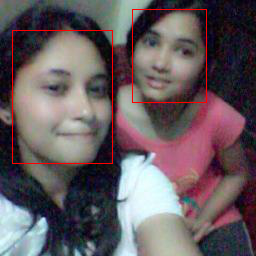

In [24]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://pbs.twimg.com/profile_images/649547506871701504/lC-keuDm_400x400.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))


# Download the image from the url
response = requests.get(single_face_image_url)
img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(img)
for face in detected_faces:
    draw.rectangle(getRectangle(face), outline='red')

# Display the image in the users default image browser.
img.show()
display(img)

###  Note :  yaha samma hamle faces haru detect garyam and ti faceharuko lag unique id generate garyam

## Find similar faces



**The following code takes a single detected face (source) and searches a set of other faces (target) to find matches (face search by image). When it finds a match, it prints the ID of the matched face to the console.**

Most important part

### Source and target: detected_faces vanni object ma jati face detect vako xan ni tesmadhya auta lai source vanyara linxa and aru lai target vanyara linxa.



###  Find matches ( auta detected face id lai aru detected face ids ko list ma khojxa)
### First, run the code in the above section (Detect faces in an image) to save a reference to a single face. Then run the following code to get references to several faces in a group image.




In [26]:
# Detect the faces in an image that contains multiple faces
# Each detected face gets assigned a new ID
multi_face_image_url = "http://www.historyplace.com/kennedy/president-family-portrait-closeup.jpg"
multi_image_name = os.path.basename(multi_face_image_url)
# We use detection model 3 to get better performance.
detected_faces2 = face_client.face.detect_with_url(url=multi_face_image_url, detection_model='detection_03')

for face in detected_faces2: print (face.face_id)
print()


aea1a612-a98d-4012-be09-52fdf61da2a6
ef102f24-1e94-4b05-960c-02f1440634c3
fd4c1ff6-d0e8-402d-84b9-a6cf102b9d68
d352dee2-be38-4392-b9bb-be400f70b9eb
6a37da1c-2be4-45df-816d-8e2101ed971d
6eb00608-4b58-4b69-b56f-d019a68d7e72
7e351619-3b92-4687-b1bf-ea2b7fc0908b
0779af09-0ad3-4ca1-a50d-a89b7435705f
b5e25471-fe76-4052-b538-0e7a37ea279a



Then add the following code block to find instances of the first face in the group. See the [find_similar](https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face.operations.faceoperations?view=azure-python#find-similar-face-id--face-list-id-none--large-face-list-id-none--face-ids-none--max-num-of-candidates-returned-20--mode--matchperson---custom-headers-none--raw-false----operation-config-) method to learn how to modify this behavior.

In [28]:
# Search through faces detected in group image for the single face from first image.
# First, create a list of the face IDs found in the second image.
second_image_face_IDs = list(map(lambda x: x.face_id, detected_faces2))
for face in second_image_face_IDs: print (face)
print()
# Next, find similar face IDs like the one detected in the first image.


aea1a612-a98d-4012-be09-52fdf61da2a6
ef102f24-1e94-4b05-960c-02f1440634c3
fd4c1ff6-d0e8-402d-84b9-a6cf102b9d68
d352dee2-be38-4392-b9bb-be400f70b9eb
6a37da1c-2be4-45df-816d-8e2101ed971d
6eb00608-4b58-4b69-b56f-d019a68d7e72
7e351619-3b92-4687-b1bf-ea2b7fc0908b
0779af09-0ad3-4ca1-a50d-a89b7435705f
b5e25471-fe76-4052-b538-0e7a37ea279a



In [29]:
similar_faces = face_client.face.find_similar(face_id=first_image_face_ID, face_ids=second_image_face_IDs) # first auta element(string) second list of image ids. 


No similar faces found in president-family-portrait-closeup.jpg .


### Print matches
Use the following code to print the match details to the console.

In [32]:
if not similar_faces:
    print('No similar faces found in', multi_image_name, '.')
# Print the details of the similar faces detected
else:
    print('Similar faces found in', multi_image_name + ':')
    for face in similar_faces:
        first_image_face_ID = face.face_id
        # The similar face IDs of the single face image and the group image do not need to match, 
        # they are only used for identification purposes in each image.
        # The similar faces are matched using the Cognitive Services algorithm in find_similar().
        face_info = next(x for x in detected_faces2 if x.face_id == first_image_face_ID)
        if face_info:
            print('  Face ID: ', first_image_face_ID)
            print('  Face rectangle:')
            print('    Left: ', str(face_info.face_rectangle.left))
            print('    Top: ', str(face_info.face_rectangle.top))
            print('    Width: ', str(face_info.face_rectangle.width))
            print('    Height: ', str(face_info.face_rectangle.height))

No similar faces found in president-family-portrait-closeup.jpg .


## Create and train a PersonGroup

The following code creates a PersonGroup with three different Person objects. It associates each Person with a set of example images, and then it trains to be able to recognize each person.

### **Person group > person group bhitra dherai person hunxan > each person ko image ko object banxa>each object bhitra autai person ko dherai image hunxan > and then it trains to be able to recognize each person.**

### Step 1 : Person group object banaunuparyo

In [114]:
# Used in the Person Group Operations and Delete Person Group examples.
# You can call list_person_groups to print a list of preexisting PersonGroups.
# SOURCE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
PERSON_GROUP_ID = "hi" #str(uuid.uuid4()) # assign a random ID (or name it anything) # j

# Used for the Delete Person Group example.
TARGET_PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)

In [115]:
str(uuid.uuid4()) # randomy generate garni raixa

'5f05b998-b56b-4d72-8bb3-7a7dcb86c316'

In [116]:
PERSON_GROUP_ID

'hi'

Maile afai name ni dena milxa group ko:


In [68]:
# PERSON_GROUP_ID  = "Baduwal family" # yasari auta group banaunu paryo

To list the Person group we  created.

In [69]:
! GET https://madan.cognitiveservices.azure.com/face/v1.0/persongroups?start=sample_group&top=2&returnRecognitionModel=True


/bin/bash: GET: command not found


In [70]:
# Yaslai chai header ma rakhnuparyo

Postman bata call garda .

header ma

key : Ocp-Apim-Subscription-Key
value : d1c82aaaf4f145c39e4397ec83602c7e

SyntaxError: ignored

### most important : persongroup banekai xaina , so first ta person group banaunu paryo.

In [117]:
'''
Create the PersonGroup
'''
# Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
print('Person group:', PERSON_GROUP_ID)
test = face_client.person_group.create(person_group_id=PERSON_GROUP_ID, name=PERSON_GROUP_ID)

# Define woman friend
woman = face_client.person_group_person.create(PERSON_GROUP_ID, person_id ="Woman") # person group id  bhitra , madan vanyara person_group_person banaunuparyo
# Define man friend
man = face_client.person_group_person.create(PERSON_GROUP_ID, name = "Man") # person group id  bhitra , tapendra vanyara person_group_person banaunuparyo
# Define child friend
child = face_client.person_group_person.create(PERSON_GROUP_ID, name = "Child") # # person group id  bhitra , priyanka vanyara person_group_person banaunuparyo

Person group: hi


APIErrorException: ignored

In [112]:
type(test)

NoneType

### Note : PERSON_GROUP_ID yo ta hamle 

In [113]:
type(woman)

azure.cognitiveservices.vision.face.models._models_py3.Person

In [109]:
woman.name

In [110]:
man.person_id

'c55cf00e-0818-4613-a7ea-589b6b66372b'

# One of the solution is zip personal_id with name

### Step 2 : auta group vaisakyo mathi , aba tyo bhitra persons ra tiniharuko faces lai add garxa

In [78]:
'''
Detect faces and register to correct person
'''
# Find all jpeg images of friends in working directory
woman_images = [file for file in glob.glob('*.jpg') if file.startswith("w")] # kunai auta person ko image list
man_images = [file for file in glob.glob('*.jpg') if file.startswith("m")] # kunai arko person ko image list
child_images = [file for file in glob.glob('*.jpg') if file.startswith("ch")] # kunai arko person ko image list
 
# Add to a woman person
for image in woman_images:
    w = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, woman.person_id, w) # Baduwal family person_group_id ma madan ko id and madan ko image rakhdenxa

# Add to a man person
for image in man_images:
    m = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, man.person_id, m) # Baduwal family person_group_id ma tapendra ko id and tapendra ko image rakhdenxa 

# Add to a child person
for image in child_images:
    ch = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, child.person_id, ch)

In [73]:
woman_images

[]


### Step 2 : Train PersonGroup (note :  sabai manxeyako akkachoti train garauni raixa)

Once you've assigned faces, you must train the PersonGroup so that it can identify the visual features associated with each of its Person objects. The following code calls the asynchronous train method and polls the result, printing the status to the console.

In [75]:
'''
Train PersonGroup
'''
print()
print('Training the person group...')
# Train the person group
face_client.person_group.train(PERSON_GROUP_ID)

while (True):
    training_status = face_client.person_group.get_training_status(PERSON_GROUP_ID)
    print("Training status: {}.".format(training_status.status))
    print()
    if (training_status.status is TrainingStatusType.succeeded):
        break
    elif (training_status.status is TrainingStatusType.failed):
        face_client.person_group.delete(person_group_id=PERSON_GROUP_ID)
        sys.exit('Training the person group has failed.')
    time.sleep(5)


Training the person group...
Training status: running.

Training status: failed.



SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Step 3 : Identify a face

The Identify operation takes an image of a person (or multiple people) and looks to find the identity of each face in the image (facial recognition search). It compares each detected face to a PersonGroup, a database of different Person objects whose facial features are known.

#### Get a test image

In [ ]:
'''
Identify a face against a defined PersonGroup
'''
# Group image for testing against
test_image_array = glob.glob('test-image-person-group.jpg')
image = open(test_image_array[0], 'r+b')

print('Pausing for 60 seconds to avoid triggering rate limit on free account...')
time.sleep (60)

# Detect faces
face_ids = []
# We use detection model 3 to get better performance.
faces = face_client.face.detect_with_stream(image, detection_model='detection_03')
for face in faces:
    face_ids.append(face.face_id)

### Identify faces

The identify method takes an array of detected faces and compares them to a PersonGroup. If it can match a detected face to a Person, it saves the result. This code prints detailed match results to the console.

In [ ]:
# Identify faces
results = face_client.face.identify(face_ids, PERSON_GROUP_ID) # 
print('Identifying faces in {}'.format(os.path.basename(image.name)))
if not results:
    print('No person identified in the person group for faces from {}.'.format(os.path.basename(image.name)))
for person in results:
    if len(person.candidates) > 0:
        print('Person for face ID {} is identified in {} with a confidence of {}.'.format(person.face_id, os.path.basename(image.name), person.candidates[0].confidence)) # Get topmost confidence score
    else:
        print('No person identified for face ID {} in {}.'.format(person.face_id, os.path.basename(image.name)))

###  Verify faces(kunai 2 ota test images lini , tyo duita image autai ho ki haina vanyara verify garni)